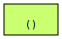

In [1]:
import torch
from torchviz import make_dot
v=torch.tensor(1.0,requires_grad=True)
make_dot(v)

## Data Generation

In [2]:
# Synthetic data generation
import numpy as np

true_b=1
true_w=2
N=100

np.random.seed(42)
x=np.random.rand(N,1)
y=true_b+true_w*x+0.1*np.random.rand(N,1)

In [3]:
# train test split
idx=np.arange(N)
np.random.shuffle(idx)
train_idx=idx[:int(N*0.8)]
val_idx=idx[int(0.8*N):]

x_train,y_train=x[train_idx],y[train_idx]
x_val,y_val=x[val_idx],y[val_idx] 

## Gradient Descent

In [4]:
# Random initialization
np.random.seed(42)
b=np.random.rand(1)
w=np.random.rand(1)
print(w,b) 

# forward pass
yhat=w*x_train+b

# compute loss
error=yhat-y_train
loss=(error**2).mean()

print(f"loss: {loss}")


[0.95071431] [0.37454012]
loss: 1.4570419026607908


In [5]:
true_b=1
true_w=2
b_range=np.linspace(true_b-3,true_b+3,101)
w_range=np.linspace(true_w-3,true_w+3,101)

# grid of b and w values
# valus for all combinations
bs,ws=np.meshgrid(b_range,w_range)
print(bs.shape,ws.shape)

(101, 101) (101, 101)


In [6]:
bs

array([[-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       ...,
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ]])

In [7]:
ws

array([[-1.  , -1.  , -1.  , ..., -1.  , -1.  , -1.  ],
       [-0.94, -0.94, -0.94, ..., -0.94, -0.94, -0.94],
       [-0.88, -0.88, -0.88, ..., -0.88, -0.88, -0.88],
       ...,
       [ 4.88,  4.88,  4.88, ...,  4.88,  4.88,  4.88],
       [ 4.94,  4.94,  4.94, ...,  4.94,  4.94,  4.94],
       [ 5.  ,  5.  ,  5.  , ...,  5.  ,  5.  ,  5.  ]])

In [8]:
dummy_x=x_train[0]
dummy_yhat=ws*dummy_x+bs
dummy_yhat.shape

(101, 101)

In [9]:
all_predictions=np.apply_along_axis(func1d=lambda x:ws*x+bs,axis=1,arr=x_train)
all_predictions.shape

(80, 101, 101)

In [10]:
all_predictions

array([[[-2.52273283, -2.46273283, -2.40273283, ...,  3.35726717,
          3.41726717,  3.47726717],
        [-2.49136886, -2.43136886, -2.37136886, ...,  3.38863114,
          3.44863114,  3.50863114],
        [-2.46000489, -2.40000489, -2.34000489, ...,  3.41999511,
          3.47999511,  3.53999511],
        ...,
        [ 0.55093621,  0.61093621,  0.67093621, ...,  6.43093621,
          6.49093621,  6.55093621],
        [ 0.58230018,  0.64230018,  0.70230018, ...,  6.46230018,
          6.52230018,  6.58230018],
        [ 0.61366415,  0.67366415,  0.73366415, ...,  6.49366415,
          6.55366415,  6.61366415]],

       [[-2.96990985, -2.90990985, -2.84990985, ...,  2.91009015,
          2.97009015,  3.03009015],
        [-2.91171526, -2.85171526, -2.79171526, ...,  2.96828474,
          3.02828474,  3.08828474],
        [-2.85352067, -2.79352067, -2.73352067, ...,  3.02647933,
          3.08647933,  3.14647933],
        ...,
        [ 2.73316008,  2.79316008,  2.85316008, ...,  

In [11]:
all_labels=y_train.reshape(-1,1,1)
all_labels.shape

(80, 1, 1)

In [12]:
all_errors=(all_predictions-all_labels)**2
all_errors.shape

(80, 101, 101)

In [13]:
all_losses=(all_errors**2).mean(axis=0)
all_losses.shape

(101, 101)

In [14]:
# compute gradients
b_grad=2*error.mean()
w_grad=2*(x_train*error).mean()
print(b_grad,w_grad)

-2.33428293147256 -1.2713249595784388


In [15]:
# set learning rate
lr=0.1
print(w,b)

[0.95071431] [0.37454012]


In [16]:
# update parameters
w=w-lr*w_grad
b=b-lr*b_grad
print(w,b)

[1.0778468] [0.60796841]


In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_val=scaler.transform(x_val)